# Examensprojekt – Student Habits vs Academic Performance:
- Projektet undersöker hur studenters livsstilsvanor (t.ex. studietid, sömn, motion, kost och psykisk hälsa) påverkar deras akademiska prestation.
- Målet var att bygga en maskininlärningsmodell som kan förutsäga studenternas examensresultat (exam_score) baserat på deras vanor.
- Datasetet är simulerat (från Kaggle) med cirka 1 000 observationer och över 15 variabler.

# 1- Import och läs data:¶
- Data lästes in i CSV file med pandas.
- Grundläggande analyser som info() and describe() användes för att förstå datans struktur och datatyper läsa in datan,
- undersöka den,
- rensa och förbereda den,
- skapa nya kolumner,
- skicka vidare till maskininlärningsmodeller..
- Saknade värden identifierades och hanterades.

In [1]:
import pandas as pd

df = pd.read_csv("student_habits_performance.csv")
df # visar de första raderna

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

# Fyllning av saknade värden:
Syftet få en först bild av hur datan ser ut om något behöver rensa

In [3]:
# Fyll saknade värden i parental_education_level
if "parental_education_level" in df.columns:
    df["parental_education_level"] = df["parental_education_level"].fillna(
        df["parental_education_level"].mode()[0]
    )

# Visa saknade värden och grundläggande statistik
display(df.isna().sum().sort_values(ascending=False))
print("\nMax attendance_percentage:", df["attendance_percentage"].max())
print("\nMedelvärde exam_score:", round(pd.to_numeric(df["exam_score"], errors="coerce").mean(), 2))

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64


Max attendance_percentage: 100.0

Medelvärde exam_score: 69.6


# 2- EDA: fördelningar(kategoriska + numeriska)
- Grafer, tabeller och analyser (histogram, heatmap, boxplot, scatter)
- syftet upptäcka samband och eventuelt problem (saknade värde, send fördelning)

In [6]:
for col in cat_col:
    print(col)

gender
part_time_job
diet_quality
parental_education_level
internet_quality
extracurricular_participation


In [7]:
df[cat_col].describe()

,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
count,1000,1000,1000,1000,1000,1000
unique,3,2,3,3,3,2
top,Female,No,Fair,High School,Good,No
freq,481,785,437,483,447,682


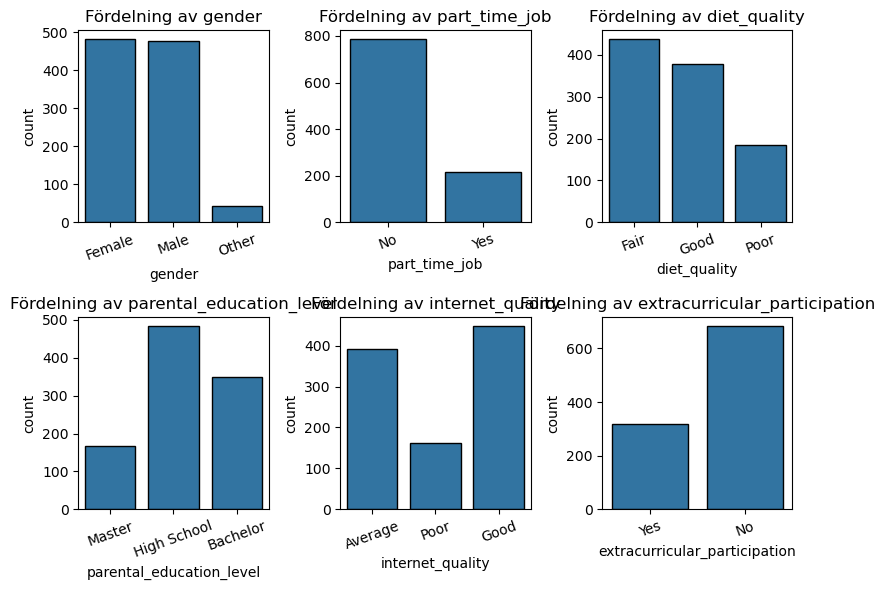

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Kategoriska kolumner (ta bort tydliga ID/namn-kolumner om de finns)
cat_col = df.select_dtypes(include='object').columns.tolist()
for idc in ["student_id", "id", "studentid", "name", "fullname"]:
    if idc in cat_col:
        cat_col.remove(idc)

# Ritar upp till 6 kategorier (2×3)
plt.figure(figsize=(8,6))
for i in range(min(6, len(cat_col))):
    plt.subplot(2, 3, i+1)
    # kan man använder countplot för kategorisk data
    sns.countplot(x=cat_col[i], data=df, edgecolor='black')
    plt.title(f'Fördelning av {cat_col[i]}')
    plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

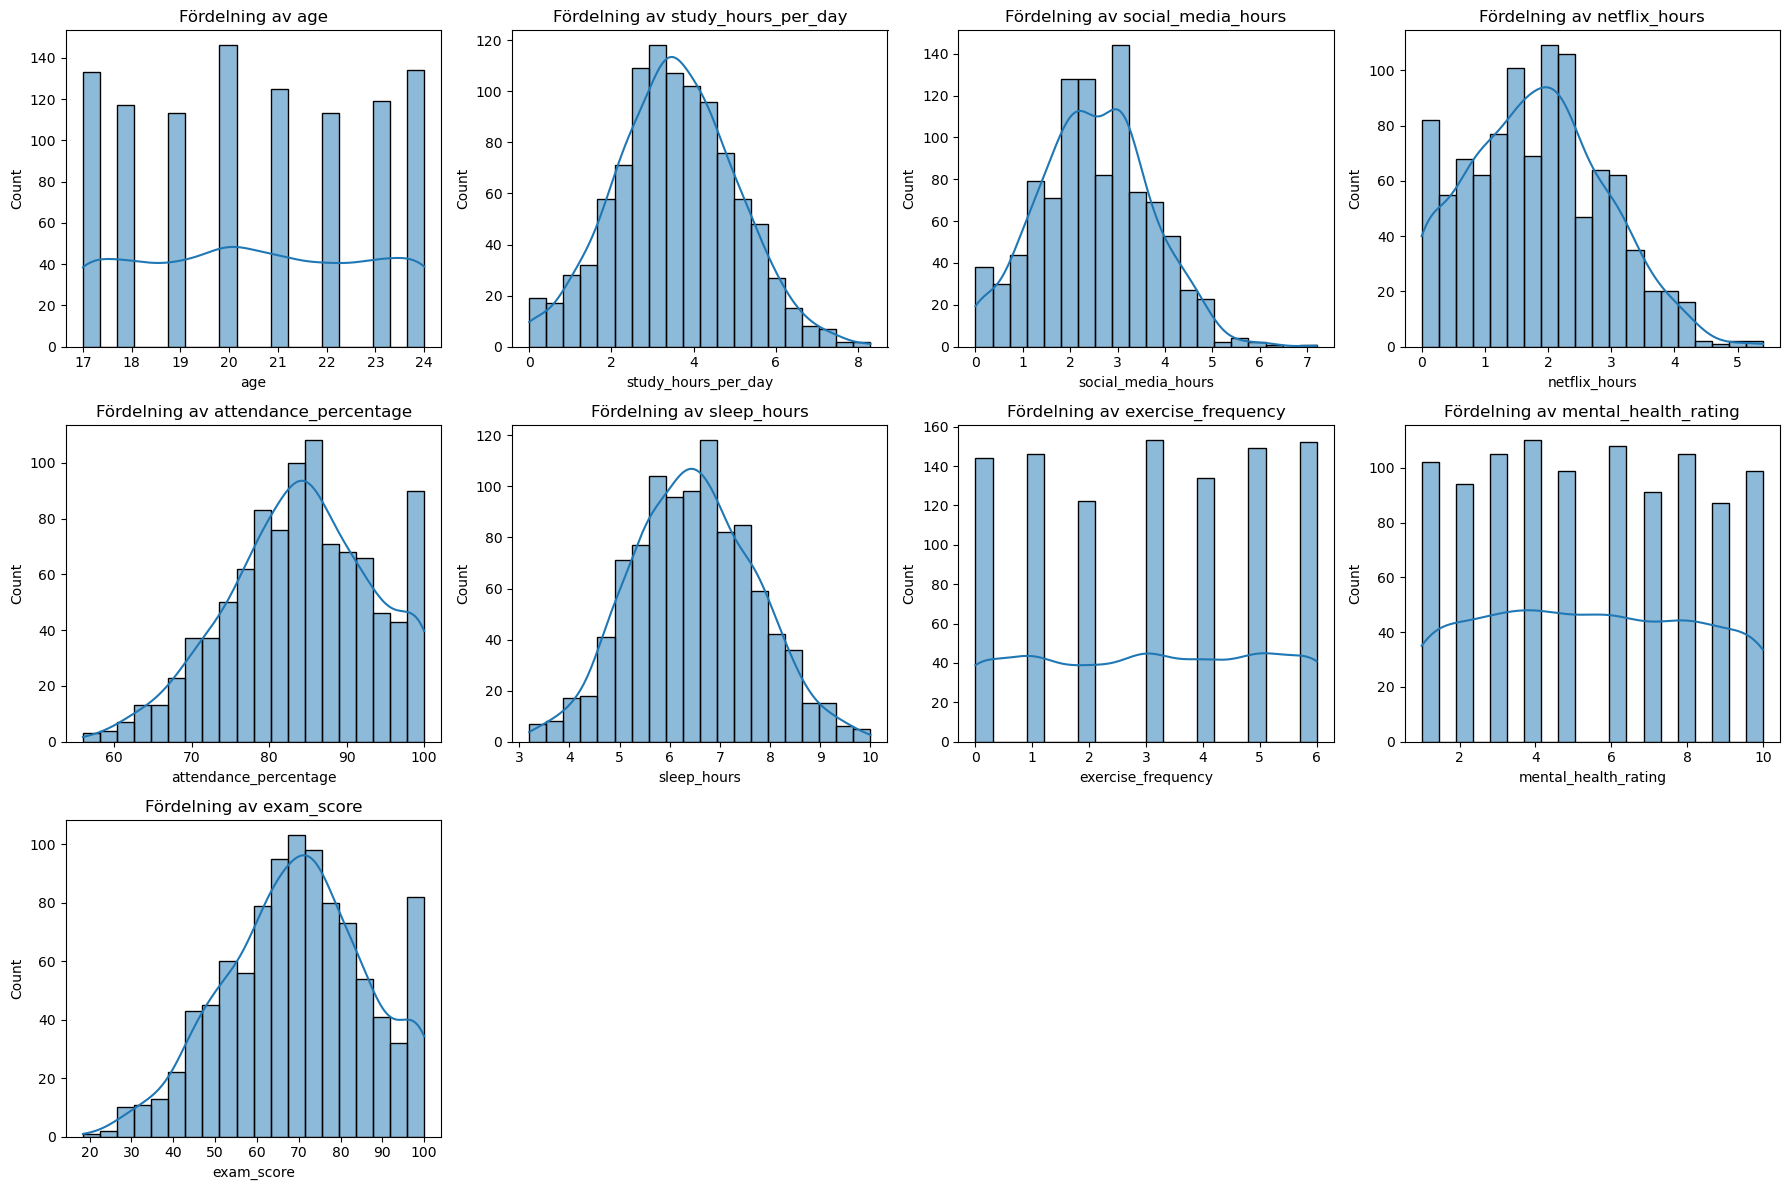

In [8]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Rita histogram för alla numeriska variabler
n_cols = 4
n_rows = int(np.ceil(len(num_cols) / n_cols))

plt.figure(figsize=(18, 4 * n_rows))
for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col].dropna(), bins=20, kde=True, edgecolor='black')
    plt.title(f"Fördelning av {col}")
plt.tight_layout()
plt.show()

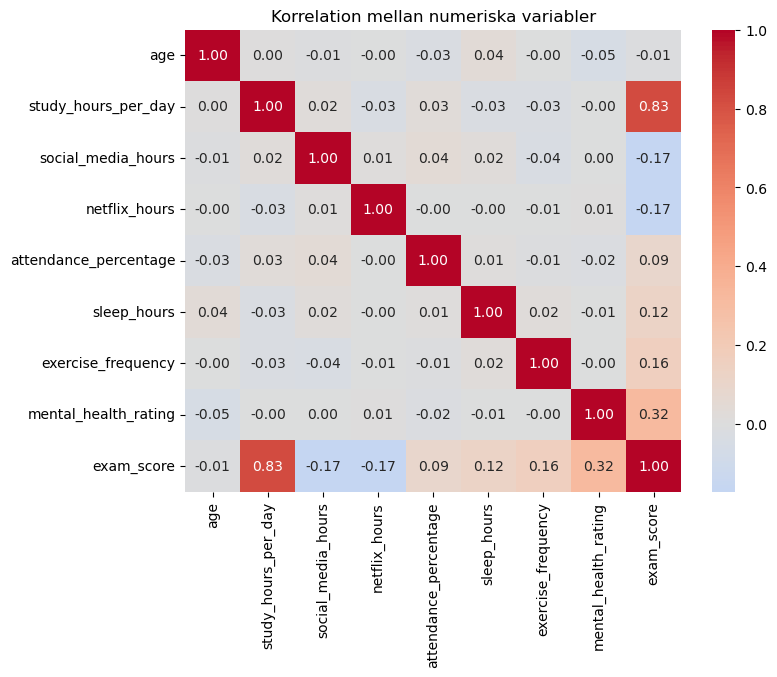

In [9]:
# Heatmap på numeriska korrelationer
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Korrelation mellan numeriska variabler")
plt.show()

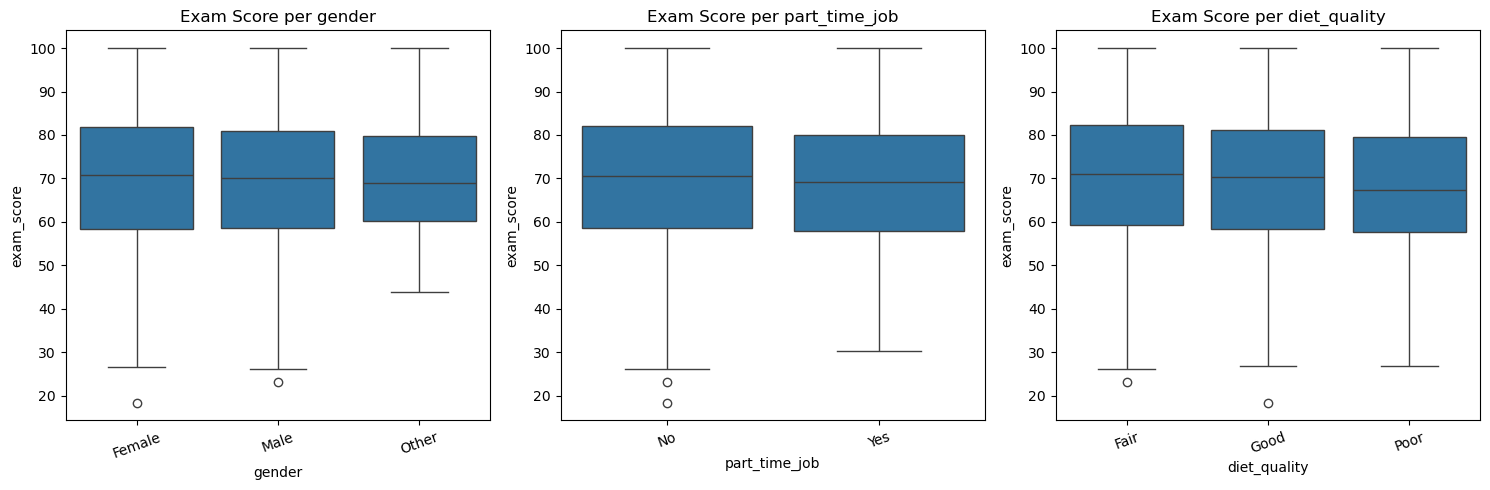

In [10]:
# Boxplot: exam_score per kategorisk variabel
cat_cols = df.select_dtypes(include="object").columns.tolist()
for drop_col in ["student_id", "id", "name", "fullname"]:
    if drop_col in cat_cols:
        cat_cols.remove(drop_col)

plt.figure(figsize=(15, 5))
for i, col in enumerate(cat_cols[:3]):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=df[col], y=df["exam_score"])
    plt.title(f"Exam Score per {col}")
    plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

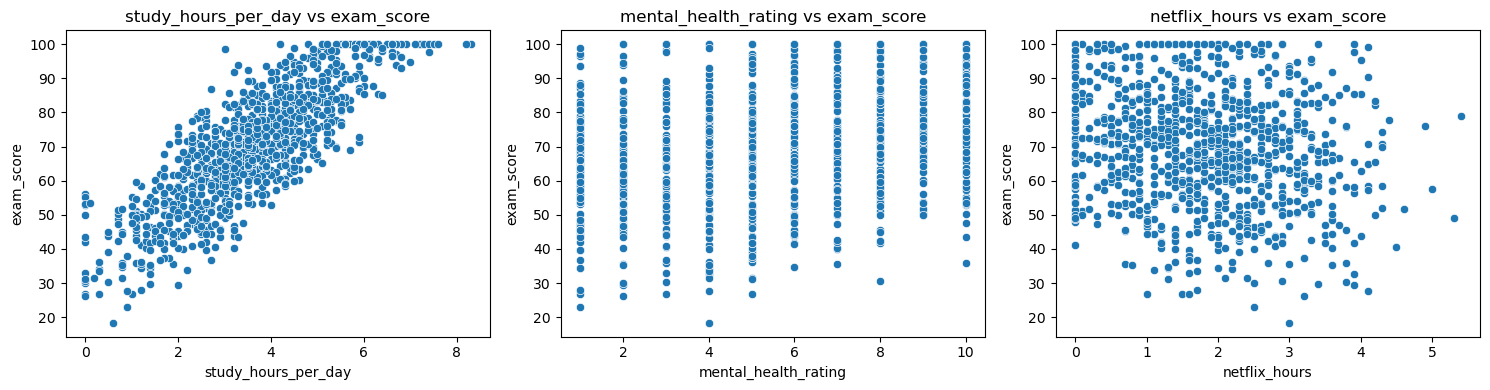

In [11]:
# Scatter: exam_score mot de 3 mest korrelerade features
corrs = df[num_cols].corr()["exam_score"].abs().sort_values(ascending=False)
top3 = corrs.index[1:4]
plt.figure(figsize=(15, 4))
for i, col in enumerate(top3):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=df[col], y=df["exam_score"])
    plt.title(f"{col} vs exam_score")
plt.tight_layout()
plt.show()

# feature-rensning

In [12]:
#Feature Engineering & Enkodning

df2 = df.copy()
if "student_id" in df2.columns:
    df2 = df2.drop("student_id", axis=1)

# Ordinala kategorier
if "diet_quality" in df2.columns:
    df2["diet_quality_e"] = df2["diet_quality"].map({"Poor": 0, "Fair": 1, "Good": 2})
if "parental_education_level" in df2.columns:
    df2["parental_education_level_e"] = df2["parental_education_level"].map(
        {"High School": 0, "Bachelor": 1, "Master": 2}
    )
if "internet_quality" in df2.columns:
    df2["internet_quality_e"] = df2["internet_quality"].map({"Poor": 0, "Average": 1, "Good": 2})

# Ta bort ej nödvändiga kategoriska variabler
drop_cols = [
    "gender",
    "part_time_job",
    "diet_quality",
    "parental_education_level",
    "internet_quality",
    "extracurricular_participation",
]
drop_cols = [c for c in drop_cols if c in df2.columns]
df3 = df2.drop(columns=drop_cols)
df3.head()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,diet_quality_e,parental_education_level_e,internet_quality_e
0,23,0.0,1.2,1.1,85.0,8.0,6,8,56.2,1,2,1
1,20,6.9,2.8,2.3,97.3,4.6,6,8,100.0,2,0,1
2,21,1.4,3.1,1.3,94.8,8.0,1,1,34.3,0,0,0
3,23,1.0,3.9,1.0,71.0,9.2,4,1,26.8,0,2,2
4,19,5.0,4.4,0.5,90.9,4.9,3,1,66.4,1,2,2


# 4- Split, Skalning och Modellträning
- Dela upp datan(feature-target'målvariabel')
- Modellträning & Utvädering

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df["exam_score"] = pd.to_numeric(df["exam_score"], errors="coerce")
#fetuers & målvariable
X = df3.drop("exam_score", axis=1)# features(vanor utan exam_score)
y = df3["exam_score"] # målvaribel (exam_score)

#Dela upp datan i traäning80% & testdatan20%
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

print("Träningsdata:", X_train.shape, y_train.shape)
print("Testdata:", X_test.shape, y_test.shape)

Träningsdata: (800, 11) (800,)
Testdata: (200, 11) (200,)


# Träna modeller

In [14]:
# Modellträning & jämförelse

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0, random_state=42),
    "Lasso": Lasso(alpha=0.1, random_state=42),
    "Random Forest": RandomForestRegressor(
        n_estimators=200, max_depth=8, random_state=42, n_jobs=-1
    ),
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    r2 = r2_score(y_test, y_pred)
    results.append((name, rmse, r2))
    print(f"{name:15s} → R²: {r2:.3f}, RMSE: {rmse:.2f}")

res_df = pd.DataFrame(results, columns=["Model", "RMSE", "R²"]).sort_values("RMSE")
print("\nResultatöversikt:")
display(res_df)

name = res_df.iloc[0]["Model"]
model = models[name]
print(f"\nBästa modell: {name}")

Linear          → R²: 0.899, RMSE: 5.08
Ridge           → R²: 0.899, RMSE: 5.08
Lasso           → R²: 0.899, RMSE: 5.10
Random Forest   → R²: 0.846, RMSE: 6.28

Resultatöversikt:


,Model,RMSE,R²
0,Linear,5.083396,0.899228
1,Ridge,5.084775,0.899173
2,Lasso,5.101304,0.898517
3,Random Forest,6.284015,0.846005



Bästa modell: Linear


# 5- Utvärdering och export (joblib)

In [15]:
# Träna modell & spara (joblib)
import joblib

# Träna om på train (X_train / y_train)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)
print(f"\nSlutlig {name} → R²: {r2:.3f}, RMSE: {rmse:.2f}")

# Exportera som bundle (modell + scaler + kolumnordning)
bundle = {
    "scaler": scaler,
    "model": model,
    "feature_order": X.columns.tolist(),
}
filename = 'student_model.joblib'
joblib.dump(bundle, filename)


Slutlig Linear → R²: 0.899, RMSE: 5.08


['student_model.joblib']